In [1]:
# Fetches the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # return array

In [2]:
X, Y = mnist["data"], mnist["target"]
X.shape # 70000 images and each has 784 features (28*28 pixels).

(70000, 784)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

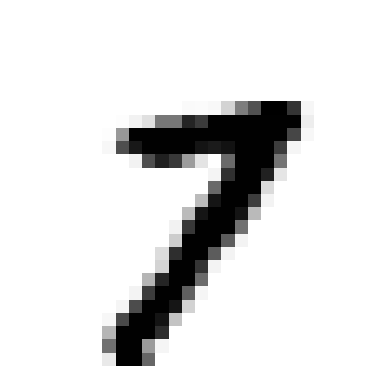

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# choose a digit from the dataset
some_digit = X[40000]
# reshape it to a 28*28 array
some_digit_image = some_digit.reshape(28, 28)
print(some_digit)
#print(some_digit_image)
# display it using Matplotlib
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
# MNIST dataset has splitted into
# a training set (the first 60,000 images) and a test set (the last 10,000 images)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

# Shuffle the training set
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

X_train.shape
y_train.shape

(60000,)

In [5]:
X_train = X_train/255.0

In [6]:
X_train.shape

(60000, 784)

In [7]:
from sklearn.preprocessing import scale
X_scaled = scale(X_train)

In [8]:
from sklearn.svm import SVC

# linear model

model_linear = SVC(kernel='linear', verbose=True)
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)



[LibSVM]

In [9]:


# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))



accuracy: 0.8734 

[[ 968    0    1    2    1    1    4    0    2    1]
 [   0 1002    6    3    0    1    4    0  118    1]
 [  19    6  901   29    4    0   15    3   54    1]
 [   7    1    5  940    0    1    3    1   50    2]
 [   7    0    9    2  884    0   21    0    9   50]
 [  35    4    4  137   13  429   15    0  242   13]
 [  17    1    7    1    4    1  917    1    9    0]
 [   4    2   21   32   20    0    0  852   36   61]
 [   9    2    1   13    6    1    6    0  935    1]
 [   9    4    1   15   28    0    0    2   44  906]]
